In [4]:
import pandas as pd
import re
import argparse
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

pd.set_option("display.max_columns", None)
input_folder = '../data/train'
# Reading input folder
files = os.listdir(input_folder)

#df_std = df_std.append(tmp.std(), ignore_index=True)

file_name = 'df.pkl'

input_folder = '../data/train'
# Reading input folder
filesnames = os.listdir(input_folder)
regex = re.compile(r'\d+')
ids = [int(x) for x in regex.findall(str(files))]
dfs = list()

for patient_id, filename in enumerate(filesnames):    
    pdf = pd.read_csv(input_folder + "/" + filename, sep='|')   
    sepsislabel_true_list = pdf[pdf['SepsisLabel'] == 1].index
    if not sepsislabel_true_list.empty:
        pdf = pdf[:min(pdf[pdf['SepsisLabel'] == 1].index)+1]
        pdf['SepsisLabel'] = 1
    pdf['patient_id'] = ids[patient_id]
    pdf.interpolate(limit_direction='both', axis=0, inplace=True) # show first hist without it
    dfs.append(pdf)
df = pd.concat(dfs, axis=0, ignore_index=True)
df.to_pickle(file_name) # where to save it usually as a .plk

In [5]:
file_name = 'df.pkl'

# Save dataframe to pickled pandas object
#df.to_pickle(file_name) # where to save it usually as a .plk

# Load dataframe from pickled pandas object
df = pd.read_pickle(file_name)


In [7]:

# vital signal features
vitals = ['HR','O2Sat','Temp','SBP','MAP','DBP','Resp','EtCO2']

# lab test features
labs = ['BaseExcess','HCO3','FiO2','pH','PaCO2','SaO2','AST','BUN','Alkalinephos','Calcium','Chloride','Creatinine','Bilirubin_direct','Glucose','Lactate',
      'Magnesium','Phosphate','Potassium','Bilirubin_total','TroponinI','Hct','Hgb','PTT','WBC','Fibrinogen','Platelets']

# demographic features
demogs = ['Age','Gender','Unit1','Unit2','HospAdmTime','ICULOS']

# labels
labels = ['SepsisLabel']

all = vitals+labs+demogs+labels


Try removing all features where misigness is over 90% - 

In [6]:
missingover90 = ['EtCO2', 'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST','BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine','Bilirubin_direct', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium','Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC','Fibrinogen', 'Platelets']

In [16]:
df.drop(missingover90,axis=1, inplace=True)

In [28]:
set(max_agg).difference(missingover90)

{'Age',
 'Gender',
 'Glucose',
 'HospAdmTime',
 'ICULOS',
 'Resp',
 'SepsisLabel',
 'Temp',
 'Unit1',
 'Unit2',
 'patient_id'}

Option 1 - Full features use

In [8]:
agg = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2','BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN','Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct','Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium','Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC','Fibrinogen', 'Platelets','Age']

aggdict = {}
for col in df.columns:
    if col in agg:
        aggdict[col]=['mean','std', 'min', 'max','skew',pd.DataFrame.kurt]
    else:
        aggdict[col]=['max']

Option 2

In [44]:
agg = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2','BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN','Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct','Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium','Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC','Fibrinogen', 'Platelets','Age']
max_agg = ['Lactate','WBC','Glucose','Temp','Resp','Creatinine','BUN'] + demogs + ['patient_id','SepsisLabel']
min_agg = ['SBP']

aggdict = {}
for col in df.columns:
    if col in min_agg:
        aggdict[col]=['min']
    elif col in max_agg:
        aggdict[col]=['max']
    else:
        aggdict[col]=['mean','std', 'min', 'max','skew',pd.DataFrame.kurt]

Option 3

In [58]:
agg = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2','BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN','Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct','Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium','Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC','Fibrinogen', 'Platelets','Age']
max_agg = ['Lactate','WBC','Glucose','Temp','Resp','Creatinine','BUN'] + demogs + ['patient_id','SepsisLabel']
min_agg = ['SBP']

aggdict = {}
for col in df.columns:
    if col in min_agg:
        aggdict[col]=['min']
    elif col in max_agg:
        aggdict[col]=['max']
    else:
        aggdict[col]=['mean','std','skew',pd.DataFrame.kurt]

Option 4 - The best Features Selection

In [8]:
agg = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2','BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN','Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct','Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium','Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC','Fibrinogen', 'Platelets','Age']
max_agg = ['Lactate','WBC','Glucose','Temp','Resp','Creatinine','BUN'] + demogs + ['patient_id','SepsisLabel']
min_agg = ['SBP']

aggdict = {}
for col in df.columns:
    if col in min_agg:
        aggdict[col]=['min']
    elif col in max_agg:
        aggdict[col]=['max']
    else:
        aggdict[col]=['mean','std']

In [9]:
grouped_multiple = df.groupby('patient_id').agg(aggdict)

#grouped_multiple = df.groupby('patient_id')[columns].agg(['mean','std', 'min', 'max'])

grouped_multiple.columns = list(map('_'.join, grouped_multiple.columns.values))
grouped_multiple

,HR_mean,HR_std,O2Sat_mean,O2Sat_std,Temp_max,SBP_min,MAP_mean,MAP_std,DBP_mean,DBP_std,Resp_max,EtCO2_mean,EtCO2_std,BaseExcess_mean,BaseExcess_std,HCO3_mean,HCO3_std,FiO2_mean,FiO2_std,pH_mean,pH_std,PaCO2_mean,PaCO2_std,SaO2_mean,SaO2_std,AST_mean,AST_std,BUN_max,Alkalinephos_mean,Alkalinephos_std,Calcium_mean,Calcium_std,Chloride_mean,Chloride_std,Creatinine_max,Bilirubin_direct_mean,Bilirubin_direct_std,Glucose_max,Lactate_max,Magnesium_mean,Magnesium_std,Phosphate_mean,Phosphate_std,Potassium_mean,Potassium_std,Bilirubin_total_mean,Bilirubin_total_std,TroponinI_mean,TroponinI_std,Hct_mean,Hct_std,Hgb_mean,Hgb_std,PTT_mean,PTT_std,WBC_max,Fibrinogen_mean,Fibrinogen_std,Platelets_mean,Platelets_std,Age_max,Gender_max,Unit1_max,Unit2_max,HospAdmTime_max,ICULOS_max,SepsisLabel_max,patient_id_max
patient_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,60.956522,7.957148,97.086957,2.130152,36.44,114.0,66.630435,14.386087,41.565217,6.801244,27.0,NaN,NaN,NaN,NaN,22.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,7.900000,0.000000,113.000000,0.000000,2.5,NaN,NaN,78.0,NaN,2.500000,0.000000,4.400000,0.000000,5.100000,0.000000,NaN,NaN,NaN,NaN,27.800000,0.000000,9.700000,0.000000,NaN,NaN,11.0,NaN,NaN,158.000000,0.000000,75.91,0,0.0,1.0,-98.60,23,0,0
1,87.640000,6.885250,100.000000,0.000000,38.17,103.0,87.660000,8.121114,63.740000,5.285830,22.0,NaN,NaN,0.360000,0.422222,23.160000,0.336473,0.412000,0.043970,7.430800,0.008164,35.640000,1.321534,NaN,NaN,NaN,NaN,17.0,NaN,NaN,8.388000,0.161186,109.000000,0.000000,1.0,NaN,NaN,150.0,2.2,2.344000,0.080593,3.984000,0.120890,3.968000,0.241779,NaN,NaN,NaN,NaN,33.784000,1.527520,12.292000,0.220088,25.292000,0.564151,12.5,NaN,NaN,196.200000,16.118608,65.79,1,NaN,NaN,-0.02,26,1,1
2,75.000000,7.830344,95.916667,2.205513,37.67,111.0,93.264167,8.004568,NaN,NaN,23.0,NaN,NaN,NaN,NaN,27.000000,0.000000,0.500000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,103.0,0.0,13.0,108.0,0.0,NaN,NaN,106.000000,0.000000,1.2,NaN,NaN,145.0,NaN,1.600000,0.000000,NaN,NaN,3.400000,0.000000,1.7,0.0,NaN,NaN,31.500000,0.000000,11.700000,0.000000,32.300000,0.000000,3.5,NaN,NaN,65.000000,0.000000,52.88,1,1.0,0.0,-0.01,38,0,2
3,75.988889,10.617572,96.711111,1.547501,37.78,113.0,89.111111,8.133464,70.644444,7.461928,21.0,NaN,NaN,NaN,NaN,23.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,8.775556,0.145457,107.933333,1.090926,0.6,NaN,NaN,244.0,NaN,2.000000,0.000000,2.593333,0.109093,3.900000,0.000000,NaN,NaN,NaN,NaN,41.591111,0.945469,14.188889,0.363642,22.280000,0.327278,11.6,NaN,NaN,211.888889,36.364185,49.52,1,NaN,NaN,-0.02,48,0,3
4,98.114583,5.540355,95.250000,1.793709,37.00,104.0,82.604167,4.104555,63.958333,4.885464,23.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,7.800000,0.000000,NaN,NaN,1.5,NaN,NaN,233.0,NaN,2.041667,0.046780,NaN,NaN,3.991667,0.233902,NaN,NaN,NaN,NaN,35.300000,0.000000,11.300000,0.000000,NaN,NaN,10.8,NaN,NaN,170.000000,0.000000,73.00,1,1.0,0.0,-214.64,24,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,104.103448,11.241171,97.827586,1.769160,38.00,98.0,85.327586,9.810959,66.948276,5.477788,24.0,NaN,NaN,2.879310,0.295960,NaN,NaN,0.456897,0.164601,7.393103,0.013683,46.517241,1.183840,98.12069,0.295960,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,0.7,NaN,NaN,169.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.672414,1.821818,11.151724,0.553566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.71,1,0.0,1.0,-4.12,29,0,19995
19996,63.767442,6.089950,99.651163,0.650411,37.22,114.0,102.767442,31.519334,75.697674,20.106307,23.0,NaN,NaN,6.325581,1.783711,27.720930,0.361652,0.511628,0.108060,7.479767,0.028448,40.941860,2.106808,NaN,NaN,NaN,NaN,58.0,NaN,NaN,8.104651,0.253156,95.720930,0.361652,8.2,NaN,NaN,164.0,1.0,2.07209

Consider Feature selection

In [10]:
train = grouped_multiple.drop(['SepsisLabel_max','patient_id_max'], axis=1)
train=train.fillna(train.mean())
y = grouped_multiple['SepsisLabel_max']

In [72]:
sfs = SequentialFeatureSelector(LogisticRegression(), scoring='f1', n_jobs=-1)
sfs = sfs.fit(train, y)
chosen = train.columns[sfs.support_]
X_t = pd.DataFrame(sfs.transform(train), columns=chosen, index=train.index)

In [73]:
chosen

Index(['O2Sat_mean', 'O2Sat_std', 'DBP_mean', 'DBP_std', 'Resp_max',
       'BaseExcess_mean', 'BaseExcess_std', 'FiO2_std', 'pH_mean', 'pH_std',
       'PaCO2_std', 'SaO2_mean', 'AST_mean', 'Alkalinephos_mean',
       'Calcium_mean', 'Chloride_mean', 'Bilirubin_direct_mean',
       'Bilirubin_direct_std', 'Glucose_max', 'Lactate_max', 'Phosphate_mean',
       'Phosphate_std', 'Potassium_mean', 'Bilirubin_total_std',
       'TroponinI_mean', 'Hct_std', 'Hgb_std', 'Fibrinogen_mean',
       'Fibrinogen_std', 'Age_max', 'Unit2_max', 'HospAdmTime_max',
       'ICULOS_max'],
      dtype='object')

In [85]:
features = list(chosen) +list(['SepsisLabel_max']) + list(['patient_id_max'])

In [86]:
grouped_multiple = grouped_multiple[features]

# Prediction

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import MissingIndicator
from feature_engine import imputation

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
grouped_multiple.drop(['SepsisLabel_max','patient_id_max'], axis=1), grouped_multiple['SepsisLabel_max'], test_size=0.2,
random_state=0)

In [13]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.mixture import GaussianMixture
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.impute import KNNImputer


In [14]:
Imputer = SimpleImputer(strategy="mean", add_indicator=True)
impute_scale_pipeline = make_pipeline(Imputer, StandardScaler())

In [50]:
rf_pipe_scale = make_pipeline(impute_scale_pipeline, RandomForestClassifier())
svc_pipe_scale = make_pipeline(impute_scale_pipeline, SVC())
gb_pipe_scale = make_pipeline(impute_scale_pipeline, GradientBoostingClassifier())
dt_pipe_scale = make_pipeline(impute_scale_pipeline, DecisionTreeClassifier() )
mlp_pipe_scale = make_pipeline(impute_scale_pipeline, MLPClassifier() )

In [ ]:
scores_rf_pipe_scale = cross_validate(rf_pipe_scale, X_train, 
                                             y_train, 
                                             cv=StratifiedKFold(3, shuffle=True)
                                             ,scoring=["f1", 
                                                       "roc_auc", "precision", 
                                                       "recall"])



scores_gb_pipe_scale = cross_validate(gb_pipe_scale, X_train, 
                                             y_train, 
                                             cv=StratifiedKFold(3, shuffle=True)
                                             ,scoring=["f1", 
                                                       "roc_auc", "precision", 
                                                       "recall"])



scores_dt_pipe_scale = cross_validate(dt_pipe_scale, X_train, 
                                             y_train, 
                                             cv=StratifiedKFold(3, shuffle=True)
                                             ,scoring=["f1", 
                                                       "roc_auc", "precision", 
                                                       "recall"])


scores_mlp_pipe_scale = cross_validate(mlp_pipe_scale, X_train, 
                                             y_train, 
                                             cv=StratifiedKFold(3, shuffle=True)
                                             ,scoring=["f1", 
                                                       "roc_auc", "precision", 
                                                       "recall"])



In [17]:
from xgboost.sklearn import XGBClassifier

params = {'xgbclassifier__colsample_bytree': 1.0,
          'xgbclassifier__gamma': 1,
          'xgbclassifier__max_depth': 3,
          'xgbclassifier__min_child_weight': 1,
          'xgbclassifier__subsample': 1.0}

XGB_pipe_scale = make_pipeline(impute_scale_pipeline, XGBClassifier(params=params))


scores_xgboost= cross_validate(XGB_pipe_scale, X_train, 
                                             y_train, 
                                             cv=StratifiedKFold(3, shuffle=True)
                                             ,scoring=["f1", 
                                                       "roc_auc", "precision", 
                                                       "recall"])


[19:44:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:45:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:45:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "params" } might not be used.

  This could be a false

In [ ]:
dt_df = pd.DataFrame(scores_dt_pipe_scale)
dt_df['model'] = 'DecisionTree'

xgb_df = pd.DataFrame(scores_xgboost_pipe_scale)
xgb_df['model'] = 'XGBoost'

gb_df = pd.DataFrame(scores_gb_pipe_scale)
gb_df['model'] = 'GradientBoosting'

rf_df = pd.DataFrame(scores_rf_pipe_scale)
rf_df['model'] = 'RandomForest'

mlp_df = pd.DataFrame(scores_mlp_pipe_scale)
mlp_df['model'] = 'MLP'

results = pd.concat([xgb_df,dt_df, gb_df, rf_df, mlp_df])
results

In [18]:
xgb_df = pd.DataFrame(scores_xgboost)
xgb_df['model'] = 'XGBoost'

In [68]:
results = pd.concat([xgb_df])
results

,fit_time,score_time,test_f1,test_roc_auc,test_precision,test_recall,model
0,4.723565,0.162002,0.738654,0.920930,0.900763,0.625995,XGBoost
1,4.838542,0.167001,0.725832,0.920388,0.901575,0.607427,XGBoost
2,4.792592,0.163999,0.703226,0.915808,0.897119,0.578249,XGBoost
0,0.454517,0.086001,0.428843,0.817506,0.753333,0.299735,LogisticRegression
1,0.423997,0.071999,0.467290,0.843348,0.791139,0.331565,LogisticRegression
2,0.485532,0.089998,0.465385,0.845818,0.846154,0.320955,LogisticRegression


Using grid search to find best parameters to optimize f1

In [ ]:
from sklearn.model_selection import GridSearchCV

score = 'f1'
XGB_pipe_scale.fit(X_train, y_train) 

params = {
        'xgbclassifier__min_child_weight': [1, 5, 10],
        'xgbclassifier__gamma': [0.5, 1, 1.5, 2, 5],
        'xgbclassifier__subsample': [0.6, 0.8, 1.0],
        'xgbclassifier__colsample_bytree': [0.6, 0.8, 1.0],
        'xgbclassifier__max_depth': [3, 4, 5]
        }


gsearch = GridSearchCV(estimator = XGB_pipe_scale, param_grid =params , scoring= score)
gsearch.fit(X_train, y_train)
gsearch.best_params_, gsearch.best_score_

[17:11:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:11:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:11:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "params" } might not be used.

  This could be a false

LOAD TEST

In [20]:
file_name = 'test.pkl'
test = pd.read_pickle(file_name)

In [21]:
test = test.groupby('patient_id').agg(aggdict)

#grouped_multiple = df.groupby('patient_id')[columns].agg(['mean','std', 'min', 'max'])

test.columns = list(map('_'.join, test.columns.values))
test

,HR_mean,HR_std,O2Sat_mean,O2Sat_std,Temp_max,SBP_min,MAP_mean,MAP_std,DBP_mean,DBP_std,Resp_max,EtCO2_mean,EtCO2_std,BaseExcess_mean,BaseExcess_std,HCO3_mean,HCO3_std,FiO2_mean,FiO2_std,pH_mean,pH_std,PaCO2_mean,PaCO2_std,SaO2_mean,SaO2_std,AST_mean,AST_std,BUN_max,Alkalinephos_mean,Alkalinephos_std,Calcium_mean,Calcium_std,Chloride_mean,Chloride_std,Creatinine_max,Bilirubin_direct_mean,Bilirubin_direct_std,Glucose_max,Lactate_max,Magnesium_mean,Magnesium_std,Phosphate_mean,Phosphate_std,Potassium_mean,Potassium_std,Bilirubin_total_mean,Bilirubin_total_std,TroponinI_mean,TroponinI_std,Hct_mean,Hct_std,Hgb_mean,Hgb_std,PTT_mean,PTT_std,WBC_max,Fibrinogen_mean,Fibrinogen_std,Platelets_mean,Platelets_std,Age_max,Gender_max,Unit1_max,Unit2_max,HospAdmTime_max,ICULOS_max,SepsisLabel_max,patient_id_max
patient_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,71.100000,5.821015,96.650000,1.747931,37.28,97.0,84.450000,7.727088,64.100000,5.540758,23.0,NaN,NaN,NaN,NaN,24.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,8.200000,0.000000,110.000000,0.000000,0.60,NaN,NaN,94.0,NaN,1.700000,0.000000,3.300000,0.000000,3.800000,0.000000,NaN,NaN,NaN,NaN,30.500000,0.000000,11.000000,0.000000,64.620000,6.979596,5.5,NaN,NaN,147.000000,0.000000,61.08,0,NaN,NaN,-6.42,20,0,1
2,93.964912,9.505572,98.921053,1.263461,37.67,85.0,87.768860,12.500297,60.289474,7.454593,30.0,NaN,NaN,3.964912,2.547377,32.236842,2.064961,0.350000,0.023146,7.337632,0.047207,60.745614,11.065267,98.0,0.0,NaN,NaN,22.0,NaN,NaN,7.730702,0.274164,102.157895,2.731640,0.90,NaN,NaN,183.0,NaN,1.838596,0.179694,2.880702,0.728279,4.457018,0.296747,NaN,NaN,NaN,NaN,27.764035,0.968357,8.401754,0.378627,36.300000,0.000000,13.7,NaN,NaN,304.385965,7.545277,67.96,0,NaN,NaN,-65.21,57,0,2
3,104.581633,8.738294,97.234694,1.925979,37.78,82.0,65.970102,9.402653,NaN,NaN,24.0,NaN,NaN,0.000000,0.000000,25.857143,1.119138,0.416327,0.036083,7.380000,0.000000,44.000000,0.000000,NaN,NaN,NaN,NaN,15.0,NaN,NaN,8.573469,0.097700,102.551020,0.447995,0.90,NaN,NaN,241.0,1.2,1.834694,0.075183,3.818367,0.189590,3.963265,0.120065,NaN,NaN,NaN,NaN,30.428571,0.466592,9.907143,0.116648,39.871429,2.255196,9.1,NaN,NaN,270.357143,22.163132,71.60,0,1.0,0.0,-179.78,49,0,3
4,60.980000,11.323353,97.640000,0.823104,37.28,105.0,76.100000,6.703544,NaN,NaN,26.0,NaN,NaN,NaN,NaN,26.240000,0.358150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.000000,0.000000,4.0,61.000000,0.000000,8.700000,0.000000,107.760000,0.358150,0.90,NaN,NaN,91.0,NaN,2.180000,0.179075,3.700000,0.000000,3.748000,0.071630,NaN,NaN,NaN,NaN,39.924000,0.035815,13.896000,0.143260,NaN,NaN,7.3,NaN,NaN,240.000000,0.000000,25.94,1,NaN,NaN,-0.03,25,0,4
5,87.184211,9.075078,98.322368,1.648370,36.83,112.0,90.157895,7.561058,NaN,NaN,21.0,NaN,NaN,NaN,NaN,24.105263,0.752275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,418.342105,101.180971,7.0,88.973684,3.385237,8.997368,0.338524,103.894737,0.752275,0.70,NaN,NaN,106.0,NaN,1.855263,0.037614,3.700000,0.000000,3.534211,0.112841,1.134211,0.112841,NaN,NaN,33.197368,0.338524,11.810526,0.075227,40.100000,0.000000,6.1,NaN,NaN,138.105263,0.752275,35.58,1,1.0,0.0,-22.28,38,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,80.445946,8.739902,95.824324,2.261441,37.25,97.0,100.459459,10.666262,79.810811,9.189631,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,9.200000,0.000000,NaN,NaN,0.96,NaN,NaN,272.0,NaN,1.700000,0.000000,3.500000,0.000000,4.300000,0.000000,NaN,NaN,NaN,NaN,40.500000,0.000000,13.900000,0.000000,NaN,NaN,10.4,NaN,NaN,206.000000,0.000000,58.00,1,NaN,NaN,-2.88,37,0,9997
9998,74.148148,12.059799,96.148148,2.070000,37.00,92.0,72.388889,7.208880,57.324074,8.181186,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN

In [22]:
X_test, y_test = test.drop(['SepsisLabel_max','patient_id_max'], axis=1), test['SepsisLabel_max']

In [23]:
X_train, y_train = grouped_multiple.drop(['SepsisLabel_max','patient_id_max'], axis=1), grouped_multiple['SepsisLabel_max']

In [24]:
logistic_pipe_scale = make_pipeline(impute_scale_pipeline, 
                                    LogisticRegression(solver='lbfgs') )

from xgboost.sklearn import XGBClassifier


# params = {'colsample_bytree': 1.0,
#           'gamma': 0.5,
#           'max_depth': 4,
#           'min_child_weight': 5,
#           'subsample': 1.0}

params = {'xgbclassifier__colsample_bytree': 1.0,
          'xgbclassifier__gamma': 1,
          'xgbclassifier__max_depth': 3,
          'xgbclassifier__min_child_weight': 1,
          'xgbclassifier__subsample': 1.0}

XGB_pipe_scale = make_pipeline(impute_scale_pipeline, XGBClassifier(params=params))

pipelines = [logistic_pipe_scale,XGB_pipe_scale]
modeln = ['lr', 'xgb']

In [25]:
from sklearn.metrics import f1_score

fitted_models = []
pipelines = [logistic_pipe_scale,XGB_pipe_scale]

for i, pipeline in enumerate(pipelines):
        #fitted_models[i] = pipeline.fit(X_train, y_train)
        predicted = pipeline.fit(X_train, y_train).predict(X_test)
        print(f'F1 score for model {modeln[i]} is:', f1_score(y_test, predicted, average='binary'))


F1 score for model lr is: 0.4359726295210166
[19:46:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


F1 score for model xgb is: 0.7246608140462889


In [26]:
lr_model = logistic_pipe_scale.fit(X_train, y_train)
xgb_model = XGB_pipe_scale.fit(X_train, y_train)

[19:48:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\Gal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


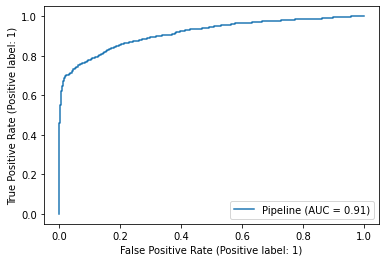

In [29]:
from sklearn import metrics
metrics.plot_roc_curve(xgb_model, X_test, y_test) 
plt.show()

In [47]:
plt.rcParams["figure.figsize"] = (20,10)

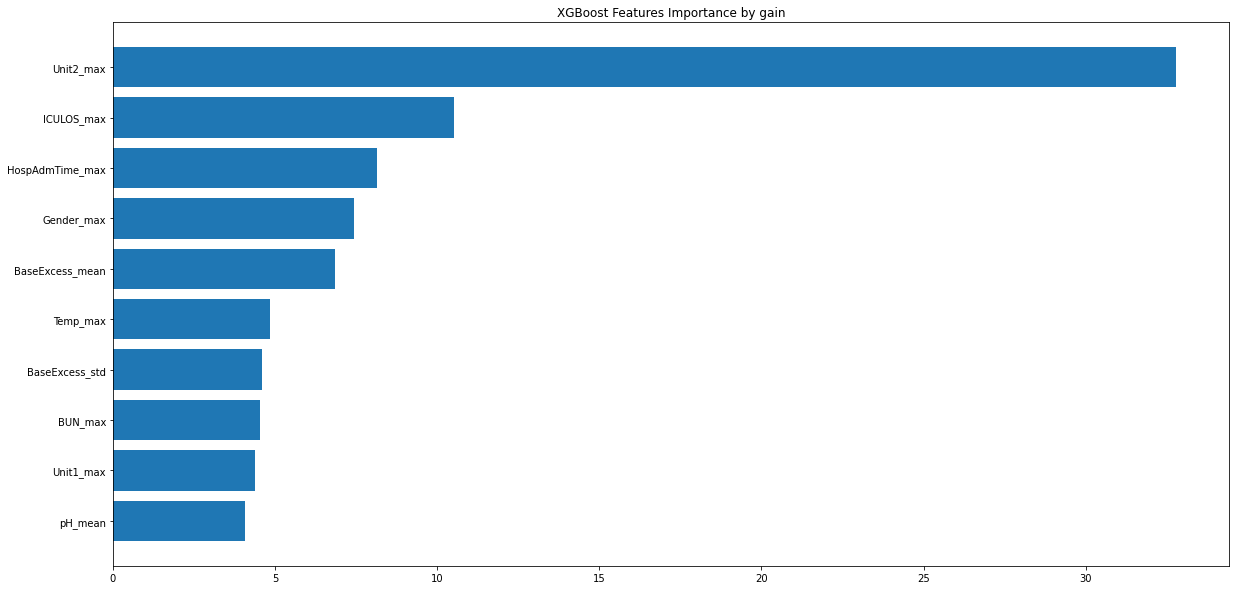

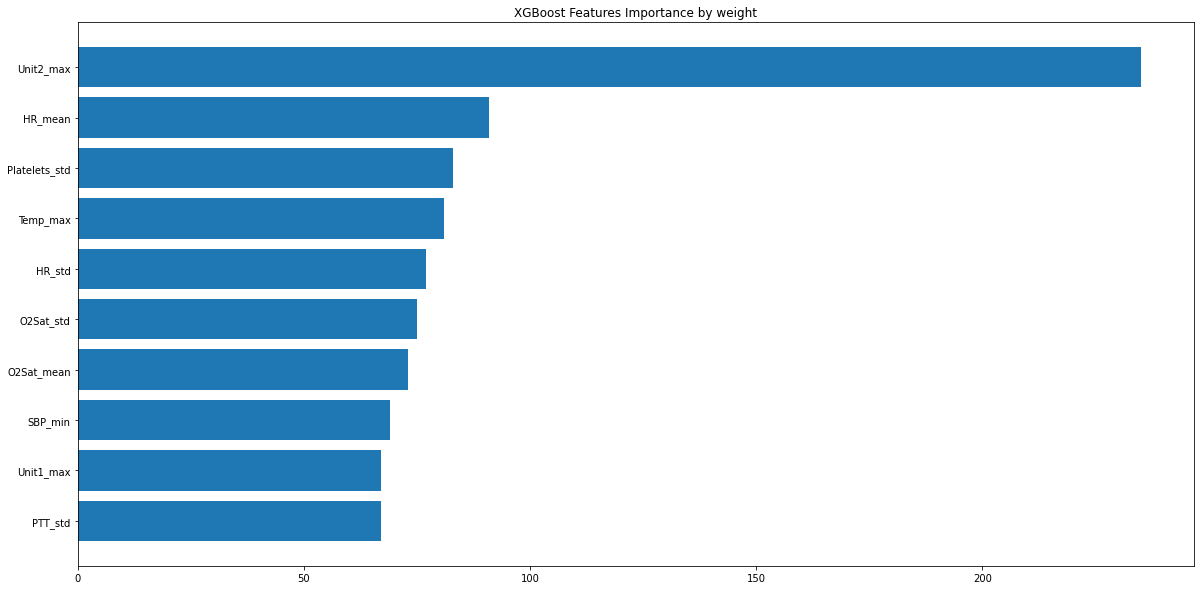

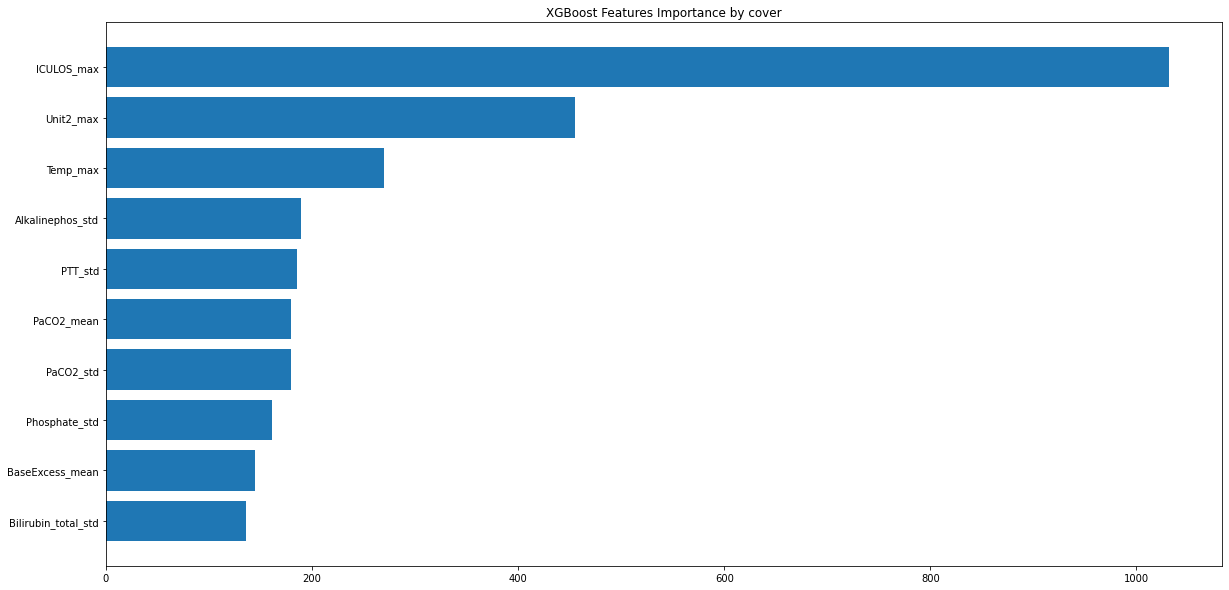

In [37]:
features_names = list(grouped_multiple.columns)

for t in ['gain', 'weight', 'cover']:
    x_importance = xgb_model[1].get_booster().get_score(importance_type=t)
    x_import_list = []
    i = 0
    for k,v in x_importance.items():
        if  i < 66:
            x_import_list.append([v, features_names[i]])
        i += 1
    x_import_list.sort(key=lambda x: x[0])
    plt.barh([i[1] for i in x_import_list[-10:]], [i[0] for i in x_import_list[-10:]])
    plt.title(f"XGBoost Features Importance by {t}")
    plt.show()
    

# plot feature importance


Feature: HR_mean, Score: 2.89717
Feature: O2Sat_mean, Score: 3.53164
Feature: MAP_mean, Score: 3.02687
Feature: DBP_mean, Score: 2.50286
Feature: EtCO2_mean, Score: 4.06438
Feature: BaseExcess_mean, Score: 6.84432
Feature: HCO3_mean, Score: 2.72995
Feature: FiO2_mean, Score: 3.62355
Feature: pH_mean, Score: 4.07627
Feature: PaCO2_mean, Score: 2.53989
Feature: SaO2_mean, Score: 2.78242
Feature: AST_mean, Score: 2.61010
Feature: Alkalinephos_mean, Score: 2.74099
Feature: Calcium_mean, Score: 3.07957
Feature: Chloride_mean, Score: 2.99888
Feature: Bilirubin_direct_mean, Score: 2.93953
Feature: Magnesium_mean, Score: 2.87597
Feature: Phosphate_mean, Score: 2.14506
Feature: Potassium_mean, Score: 2.69042
Feature: Bilirubin_total_mean, Score: 3.62107
Feature: TroponinI_mean, Score: 3.05534
Feature: Hct_mean, Score: 2.88028
Feature: Hgb_mean, Score: 3.21590
Feature: PTT_mean, Score: 2.98453
Feature: Fibrinogen_mean, Score: 2.94137
Feature: Platelets_mean, Score: 2.95741


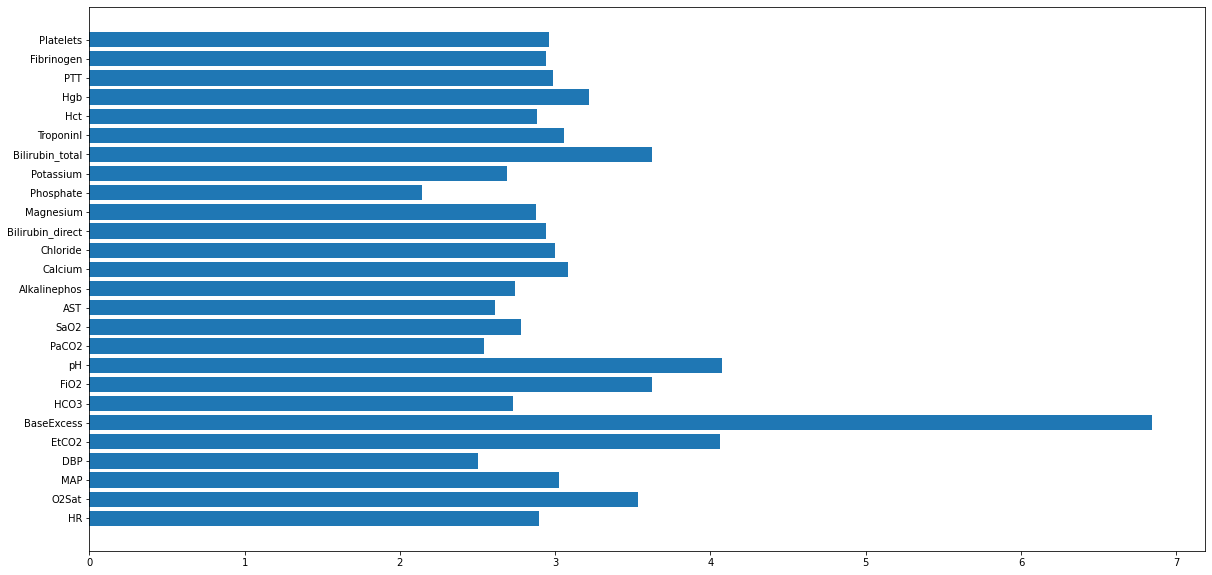

In [48]:
x_importance = xgb_model[1].get_booster().get_score(importance_type='gain')
x_names = []
x_values = []
x_import_list = []
i = 0
# summarize feature importance
for k,v in x_importance.items():
    if  i < 66:
        x_import_list.append([v, features_names[i]])
        if 'mean' in features_names[i] or ('max' in features_names[i] and features_names[i].replace("max", "") in demogs):
            x_names.append(features_names[i].replace("_mean", "").replace("max", ""))
            x_values.append(v)
            print(f'Feature: %s, Score: %.5f' % (features_names[i],v))
    i += 1

# plot feature importance
plt.barh(x_names, x_values)
plt.show()